In [155]:
import tensorflow as tf
import tensorflow_io as tfio
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import os 
import numpy as np
from tensorflow import keras
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from methods_audio import data_handling
from methods_audio import data_augmentation
from methods_audio import denoising 
from methods_audio import model_performance_training
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, TimeMask, SpecCompose, SpecFrequencyMask, Mp3Compression
import random
from methods_audio import data_handling
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, TimeMask, Reverse, TanhDistortion, ClippingDistortion, Gain, Mp3Compression
import random
from methods_audio import data_handling
import numpy as np 
import scipy.io.wavfile as wavfile


In [2]:
def read_in_data(file_name, label):  
    file_contents = tf.io.read_file(file_name) #retuns a string 
    wave, _ = tf.audio.decode_wav(file_contents, desired_channels=1) # transforms string into actual wav
    wave = tf.squeeze(wave, axis= -1) #removes axis 
    return wave, label

In [3]:
import scipy.io.wavfile as wavfile
def save_sound(reduced_noise, rate, destination_file):
    # because the denoised clips will be used by tf.audio.decode_wav and this only takes 16-bit files, the denoised audios are saved as int16
    # https://stackoverflow.com/questions/64813162/read-wav-file-with-tf-audio-decode-wav
    wavfile.write(destination_file, rate, reduced_noise) 

In [106]:
def joint_plots (origen_file, destination_file):
    # Load audio file and apply FFT
    sample_rate, samples = wavfile.read(origen_file)

    samples = samples - samples.mean() # remove the mean 

    fig = plt.figure(figsize=(10, 12))

    # Plot time-domain representation of the audio signal
    ax1 = plt.subplot(311)
    t = np.arange(len(samples)) / float(sample_rate)
    ax1.plot(t, samples)
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Amplitude')
    ax1.set_title('Time-domain representation')
    ax1.grid()

    # Combine all the plots into a single figure
    plt.tight_layout()
    plt.savefig(destination_file)
    plt.show()
    plt.close()
    plt.show()

In [153]:
def time_gaussian_noise(samples, probability): 
    # Similar to Noise Adds
    sample_rate = 8000
    augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.15, p=probability),
])  
    augmented_samples = augment(samples=samples, sample_rate=sample_rate)
    return augmented_samples

def time_reverse(samples, probability):
    # Similar to rand time shift 
    sample_rate = 8000
    augment = Compose([
    Reverse(p=probability),
    ])  
    augmented_samples = augment(samples=samples, sample_rate=sample_rate)
    return augmented_samples

def time_pitch_shift(samples, probability): 
    # Same as pitch shift, similar to wow resampling 
    sample_rate = 8000
    augment = Compose([  
    PitchShift(min_semitones=-4, max_semitones=4, p=probability),
])  
    augmented_samples = augment(samples=samples, sample_rate=sample_rate)
    return augmented_samples

def time_tahn(samples, probability):
    sample_rate = 8000
    augment = Compose([
        TanhDistortion( min_distortion=0.01, max_distortion=0.7, p=probability), 
    ])
    augmented_samples = augment(samples=samples, sample_rate=sample_rate)
    return augmented_samples

def time_strecht(samples, probability): 
    sample_rate = 8000
    augment = Compose([
    TimeStretch(min_rate=0.8, max_rate=1.25, p = probability),
])  
    augmented_samples = augment(samples=samples, sample_rate=sample_rate)
    return augmented_samples



In [16]:
file = 'data/train/Clips_ELP/ecoguns13.wav'

In [92]:
file_contents = tf.io.read_file(file) #retuns a string 
wave, _ = tf.audio.decode_wav(file_contents, desired_channels=1) # transforms string into actual wav
wave = tf.squeeze(wave, axis= -1) #removes axis 
wave.numpy()

array([-0.0199585 , -0.02355957, -0.01721191, ..., -0.01785278,
       -0.03027344, -0.03088379], dtype=float32)

In [156]:
# generating new sample 
new_sample = time_tahn(wave.numpy(), 1)
new_sample


array([-0.02150013, -0.02465697, -0.01890604, ..., -0.01952519,
       -0.02976904, -0.03018376], dtype=float32)

In [157]:
save_sound(new_sample, 8000, 'tahn.wav')

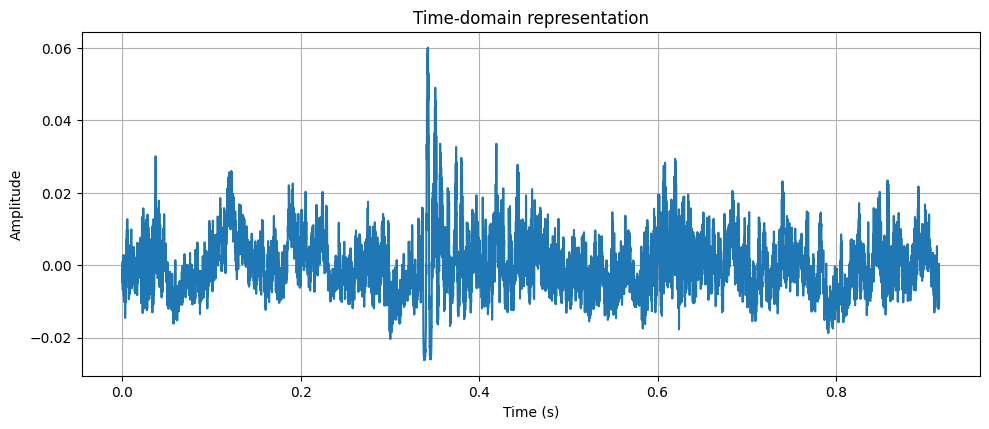

In [158]:
joint_plots('tahn.wav', 'tahn.png')

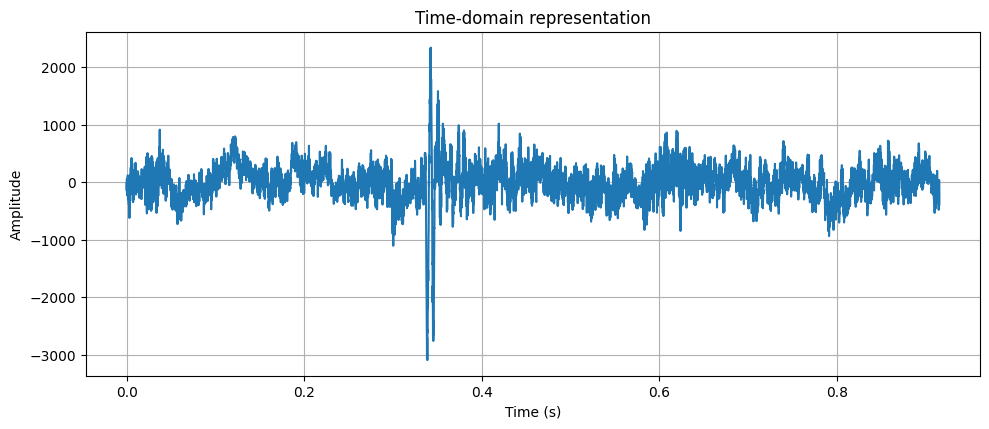

In [108]:
joint_plots(file, 'original.png')